In [101]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dstest.csv')
df.head(50)

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.00,1,1562469807407,120000.0,0,0,content-09235
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.00,0,1562469927310,240000.0,0,0,content-09235
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.00,0,1562470047330,360000.0,0,0,content-09235
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.00,0,1562470167720,480000.0,0,0,content-09235
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.00,0,1562470287353,600000.0,0,0,content-09235
5,Streamroot TV,VOD,ME1,0.0,12026360.0,0.0,0.00,0,1562470407799,720000.0,0,0,content-09235
6,Streamroot TV,VOD,ME1,0.0,24420072.0,0.0,0.00,0,1562470527768,840000.0,0,0,content-09235
7,Streamroot TV,VOD,ME1,0.0,8630328.0,0.0,0.00,0,1562470647404,960000.0,0,0,content-09235
8,Streamroot TV,VOD,ME1,4411816.0,6455712.0,0.0,0.61,2,1562470767693,1080000.0,0,0,content-09235
9,Streamroot TV,VOD,ME1,2918080.0,5611104.0,0.0,0.25,3,1562470887701,1200000.0,0,0,content-09235


#### Question 1
Performance metric: average proportion of data downloaded that came through the P2P network



In [6]:
def get_perf(row):
    try:
        perf = row['p2p']/(row['p2p'] + row['cdn']) 
    except ZeroDivisionError:
        # rows without any download will be Nan to avoid skewing the mean
        perf = None
    
    return perf

In [8]:
# make performance metric column
df['perf'] = df.apply(get_perf, axis=1)
# get mean performance for each customer
customer_perf = df.groupby('company')['perf'].mean().round(3)
customer_perf

company
Flash Infos      0.368
Sports News      0.241
Streamroot TV    0.430
Name: perf, dtype: float64

#### Question 2
#### 2.1
To know if a payload is the first in a session, we can check if the session duration so far is equal to two minutes (or 120000 ms).
#### 2.2

In [22]:
df['isFirstPayload'] = df['sessionDuration'].map(lambda x: x == 120000)
df.head()

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,perf,isFirstPayload
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,0.0,True
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,0.0,False
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,0.0,False
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,0.0,False
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,0.0,False


#### 2.3
Assuming that one session is equivalent to one viewer:

In [28]:
distinct_viewers = df.groupby('company')['isFirstPayload'].sum()
distinct_viewers

company
Flash Infos        805.0
Sports News        115.0
Streamroot TV    19914.0
Name: isFirstPayload, dtype: float64

#### Question 3
#### 3.1

In [31]:
playback_errors = pd.DataFrame({
    'playbackErrorCount': [0, 1, 0, 1, 0], 
    'totalPlaybackErrorCount':[0, 1, 1, 2, 2]})
playback_errors.index.name = 'payloadID'
playback_errors

,playbackErrorCount,totalPlaybackErrorCount
payloadID,,
0,0,0
1,1,1
2,0,1
3,1,2
4,0,2


#### 3.2
A session that has one or more playback errors will go through the state playbackErrorCount=totalPlaybackErrorCount=1 exactly once:

In [40]:
num = df.loc[(df['playbackErrorCount'] == 1) & (df['totalPlaybackErrorCount'] == 1)].shape[0]
print(f"Number of disctinct viewers who experienced at least one playback error: {num}")

Number of disctinct viewers who experienced at least one playback error: 8


#### Question 4
#### 4.1

In [92]:
def readable_date(timestamp):
    delta = dt.datetime.utcfromtimestamp(timestamp*0.001) - dt.timedelta(minutes=2)
    readable = delta.strftime("%m/%d/%Y %H:%M")
    
    return readable

STV = df.loc[df['company'] == 'Streamroot TV']
STV['readableDate'] = STV['timestamp'].map(readable_time)
STV.head()

/Users/Hannah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,perf,isFirstPayload,readableDate
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235,0.0,True,07/07/2019 03:21
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235,0.0,False,07/07/2019 03:23
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235,0.0,False,07/07/2019 03:25
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235,0.0,False,07/07/2019 03:27
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235,0.0,False,07/07/2019 03:29


#### 4.2

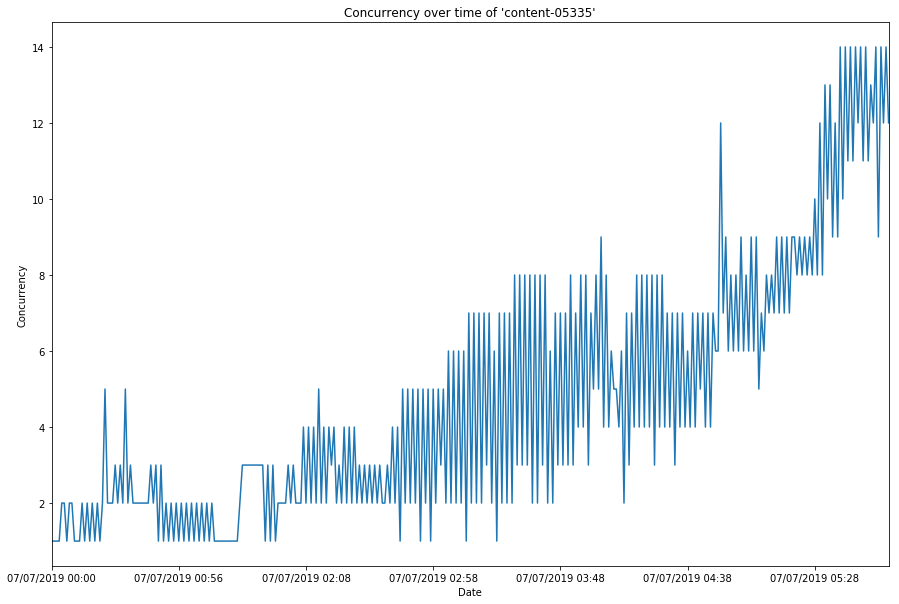

In [91]:
X = STV.loc[STV['content'] == 'content-05335']
concurrency = X['readableDate'].value_counts(sort=False).sort_index()

plt.figure(figsize=(15,10))
plt.title("Concurrency over time of 'content-05335'")
plt.xlabel("Date")
plt.ylabel("Concurrency")
concurrency.plot()

#### 4.3

In [109]:
STV['concurrency'] = STV.groupby(['content', 'readableDate'])['timestamp'].transform('count')
mean_perf = STV.loc[STV['concurrency'] < 10]['perf'].mean()
mean_perf

/Users/Hannah/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.428443512727235

#### 4.4

In [115]:
STV.groupby('concurrency')['perf'].quantile(0.25)

concurrency
1     0.000000
2     0.732849
3     1.000000
4     0.800762
5     1.000000
6     0.931741
7     1.000000
8     1.000000
9     1.000000
10    1.000000
11    1.000000
12    0.000000
13    1.000000
14    1.000000
15    1.000000
16    0.000000
18    0.839612
Name: perf, dtype: float64

Starting from a concurrency of 3, there are always 75% of payloads indicating a performance over 0.8